In [2]:
import matplotlib.pyplot as plt
import numpy as np

def symbolic_sequence_f(orbit, num_partitions):

    def split_partitions(num_partitions):
        symbols = list(range(1, num_partitions + 1))
        partitions = []

        partition_points = np.linspace(0, 1, num_partitions + 1)

        for i in range(num_partitions):
            start = partition_points[i]
            end = partition_points[i + 1]
            symbol = symbols[i]
            partitions.append((start, end, symbol))
        return partitions


    sequence = []
    partitions = split_partitions(num_partitions)

    for x in orbit:
        
        # Determinar en qué partición cae x y agregar el símbolo correspondiente
        for (start, end, symbol) in partitions:
            if start <= x < end:
                sequence.append(symbol)
                break

    return sequence

In [3]:
def J_bivariante(X,Y,tau,fases):
    def distancia(p1, p2):
        return np.linalg.norm(np.array(p2)-np.array(p1))
    ff1 = np.angle(np.fft.rfft(X))[:fases]
    ff2 = np.angle(np.fft.rfft(Y))[:fases]
    vectores = []
    for i in range(len(ff1)-1):
        p1 = [ff1[i], ff2[i]]
        p2 = [ff1[i+1], ff2[i+1]]
        cuadrante = [[p2[0]-p1[0], p2[1]-p1[1]], [p2[0]-p1[0], p2[1]+2*np.pi-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]],[p2[0]+2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-p1[0],p2[1]-2*np.pi-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]]]
        distancia1 = [distancia(p1,c) for c in cuadrante]
        p2=cuadrante[np.argmin(distancia1)]
        vectores.append([p2[0]-p1[0],p2[1]-p1[1]])
    angulos=[]
    for i in range(len(vectores)-1):
        v1=vectores[i]
        v2=vectores[i+1]
        v1_norm=v1/np.linalg.norm(v1)
        v2_norm=v2/np.linalg.norm(v2)
        angulo=np.arccos(np.clip(np.dot(v1_norm,v2_norm),-1.0,1.0))
        cruz=v1[0]*v2[1]-v1[1]*v2[0]
        if cruz>0:
            angulo=np.pi-angulo
        if cruz==0 and angulo==0:
            angulo=angulo
        if cruz==0 and angulo<0:
            angulo=np.pi
        if cruz<0:
            angulo=angulo+np.pi
        angulos.append(angulo)
    e=[]
    for k in range(len(angulos)):
        e.append(np.exp(angulos[k]*1j))
    e1=np.sum(e)/len(angulos)
    J=1.-np.abs(e1.real)
    return J

In [4]:
def J_univariante(X,tau,fases):
    def distancia(p1, p2):
        return np.linalg.norm(np.array(p2)-np.array(p1))
    x1 = X[tau:]
    y1 = X[:-tau]
    ff1 = np.angle(np.fft.rfft(x1))[:fases]
    ff2 = np.angle(np.fft.rfft(y1))[:fases]
    # ff1 = transition_point(ff1, 6)
    # ff2 = transition_point(ff2, 50)
    
    vectores = []
    for i in range(len(ff1)-1):
        p1 = [ff1[i], ff2[i]]
        p2 = [ff1[i+1], ff2[i+1]]
        cuadrante = [[p2[0]-p1[0], p2[1]-p1[1]], [p2[0]-p1[0], p2[1]+2*np.pi-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]],[p2[0]+2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]+2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-p1[0],p2[1]-2*np.pi-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]-2*np.pi-p1[1]],[p2[0]-2*np.pi-p1[0],p2[1]-p1[1]],
            [p2[0]-2*np.pi-p1[0],p2[1]+2*np.pi-p1[1]]]
        distancia1 = [distancia(p1,c) for c in cuadrante]
        p2 = cuadrante[np.argmin(distancia1)]
        vectores.append([p2[0]-p1[0],p2[1]-p1[1]])
    angulos = []
    for i in range(len(vectores)-1):
        v1=vectores[i]
        v2=vectores[i+1]
        v1_norm=v1/np.linalg.norm(v1)
        v2_norm=v2/np.linalg.norm(v2)
        angulo=np.arccos(np.clip(np.dot(v1_norm,v2_norm),-1.0,1.0))
        cruz=v1[0]*v2[1]-v1[1]*v2[0]
        if cruz>0:
            angulo=np.pi-angulo
        if cruz==0 and angulo==0:
            angulo=angulo
        if cruz==0 and angulo<0:
            angulo=np.pi
        if cruz<0:
            angulo=angulo+np.pi
        angulos.append(angulo)
    e=[]
    for k in range(len(angulos)):
        e.append(np.exp(angulos[k]*1j))
    e1=np.sum(e)/len(angulos)
    J=1.-np.abs(e1.real)
    return J

In [5]:
import numpy as np

def lyapunov_exponent_from_orbit(orbit, r):
    lyapunov_sum = 0

    for x in orbit:
        # Derivada de la función logística
        derivative = abs(r * (1 - 2 * x))
        if derivative == 0:
            lyapunov_sum += 0
        else:
            lyapunov_sum += np.log(derivative)

    # Calcular el exponente de Lyapunov
    lyapunov_exponent = lyapunov_sum / len(orbit)
    return lyapunov_exponent


Partición:  2
Interpolacion:  no
Dinámica simbólica


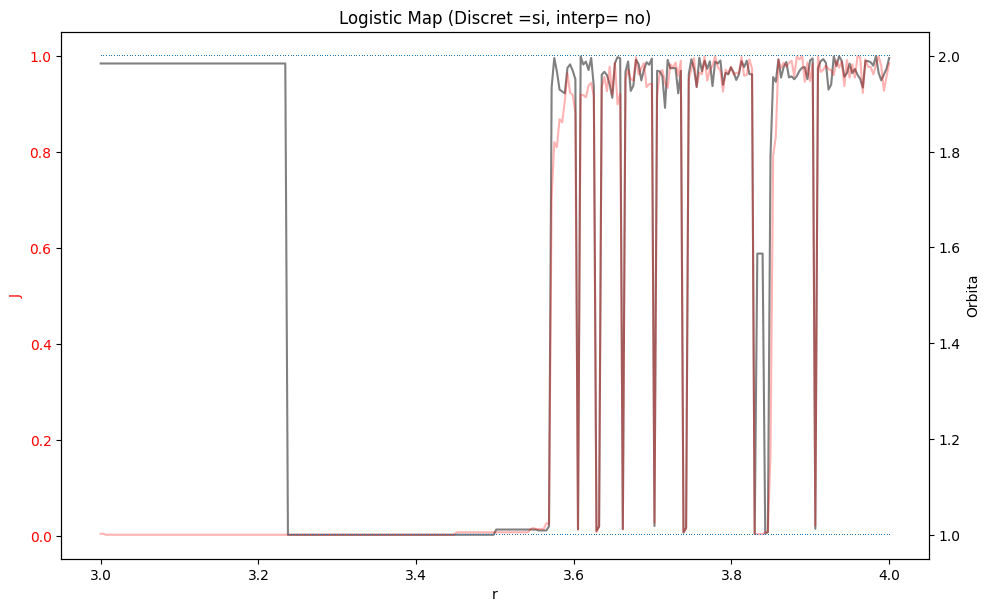

Interpolacion:  si
Interpolación
Dinámica simbólica


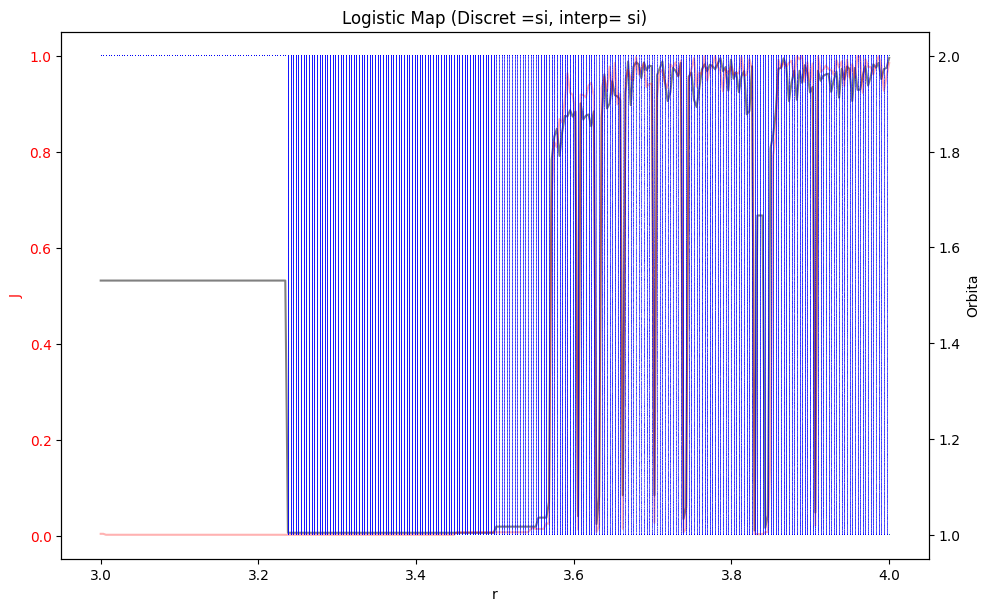

Partición:  5
Interpolacion:  no
Dinámica simbólica


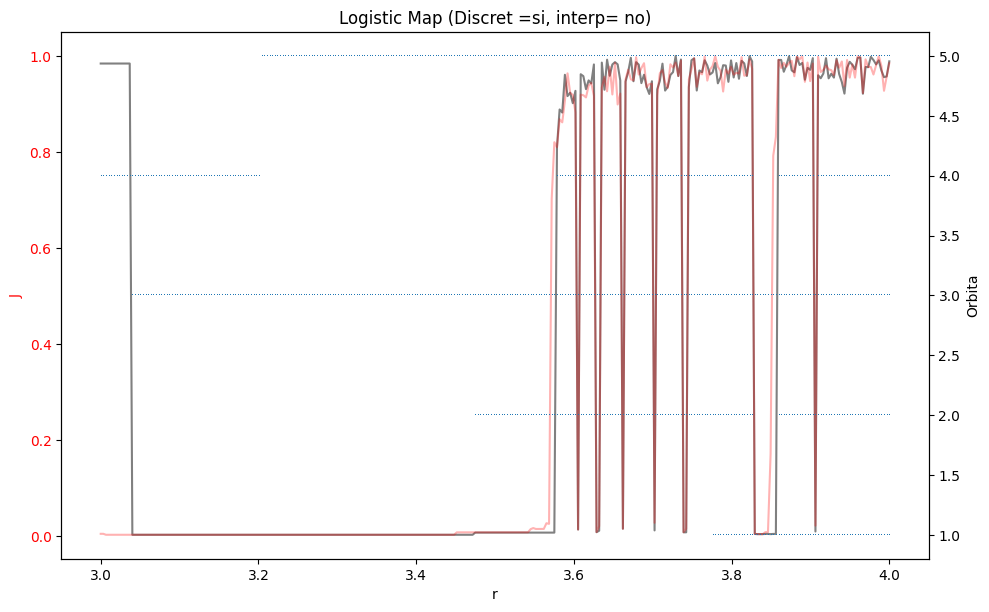

Interpolacion:  si
Interpolación
Dinámica simbólica


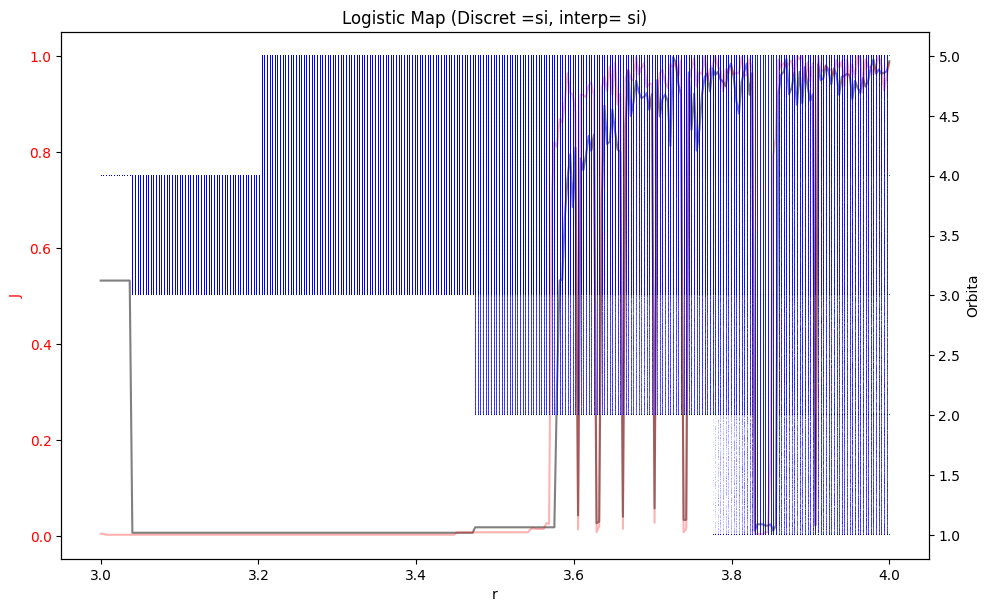

Partición:  10
Interpolacion:  no
Dinámica simbólica


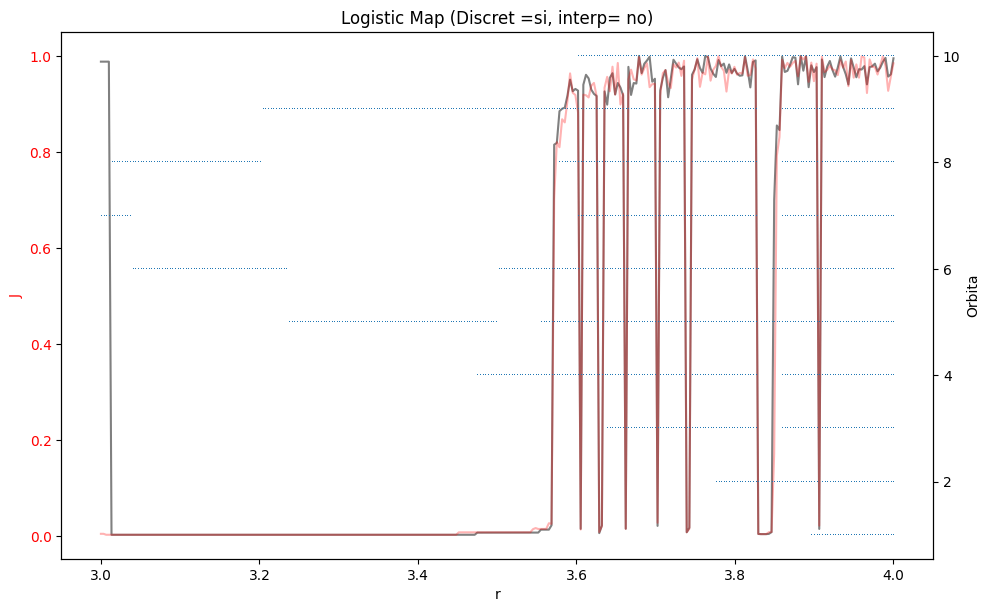

Interpolacion:  si
Interpolación
Dinámica simbólica


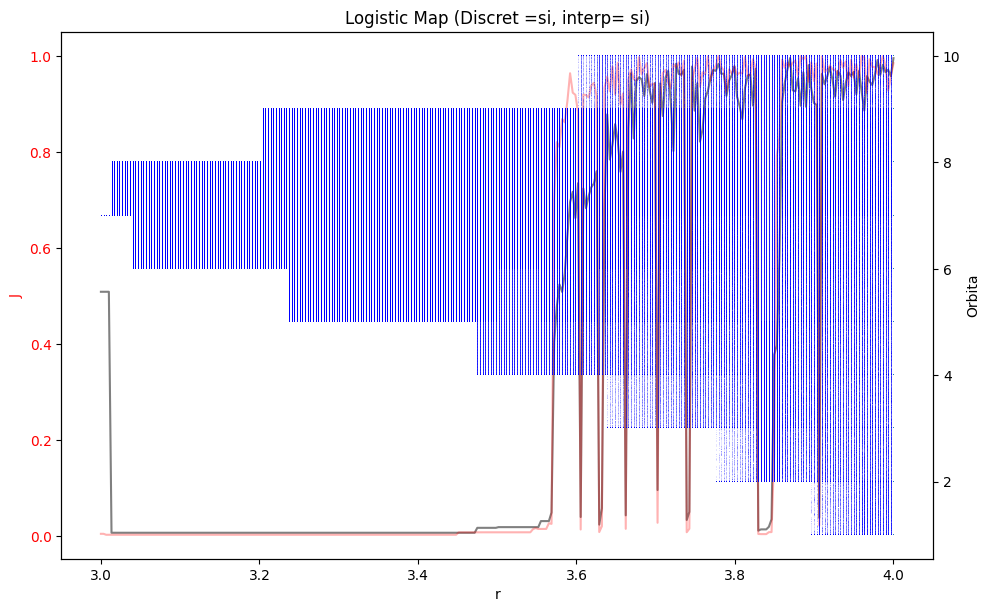

Partición:  50
Interpolacion:  no
Dinámica simbólica


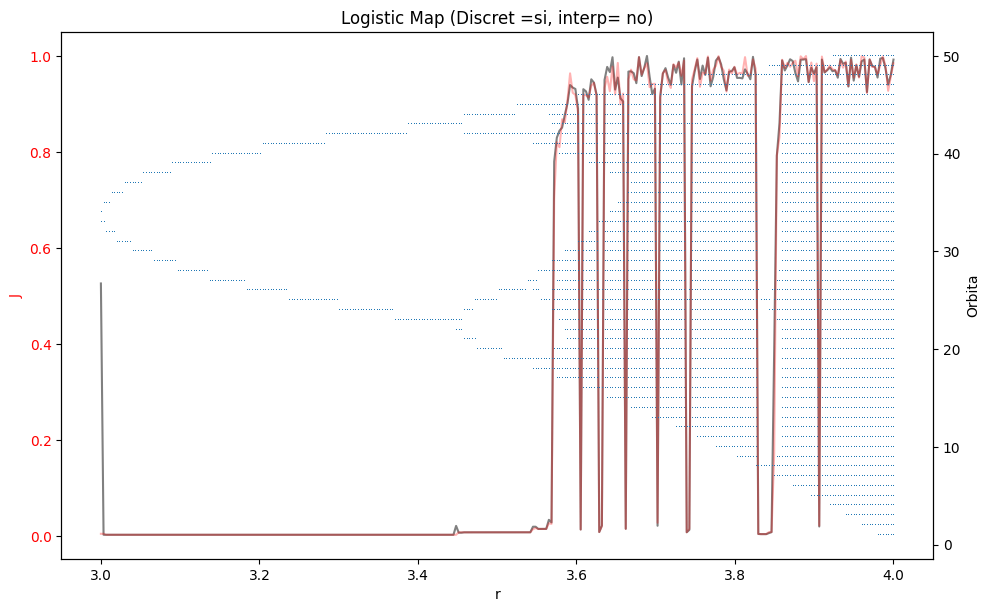

Interpolacion:  si
Interpolación
Dinámica simbólica


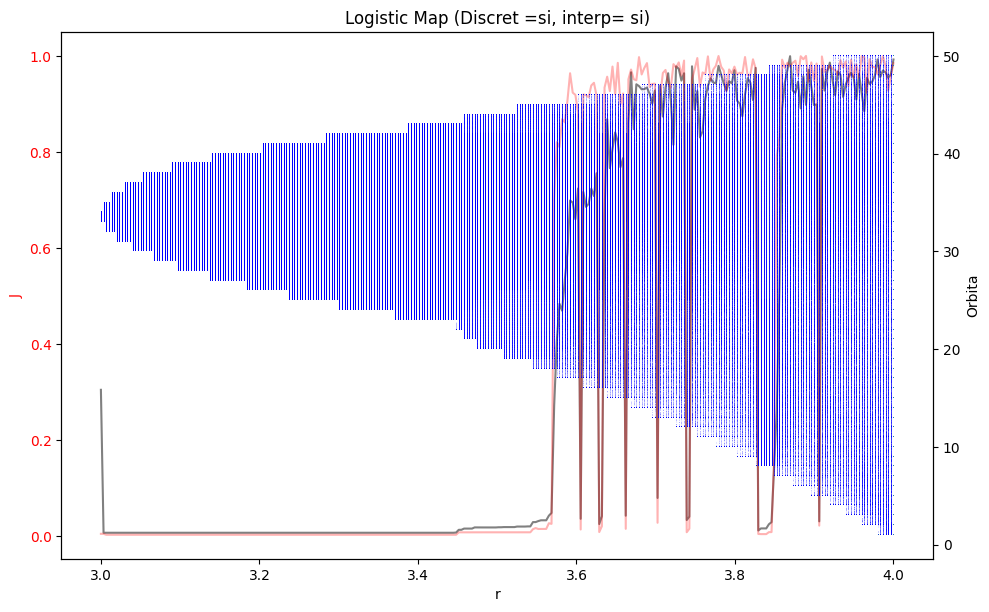

Partición:  88
Interpolacion:  no
Dinámica simbólica


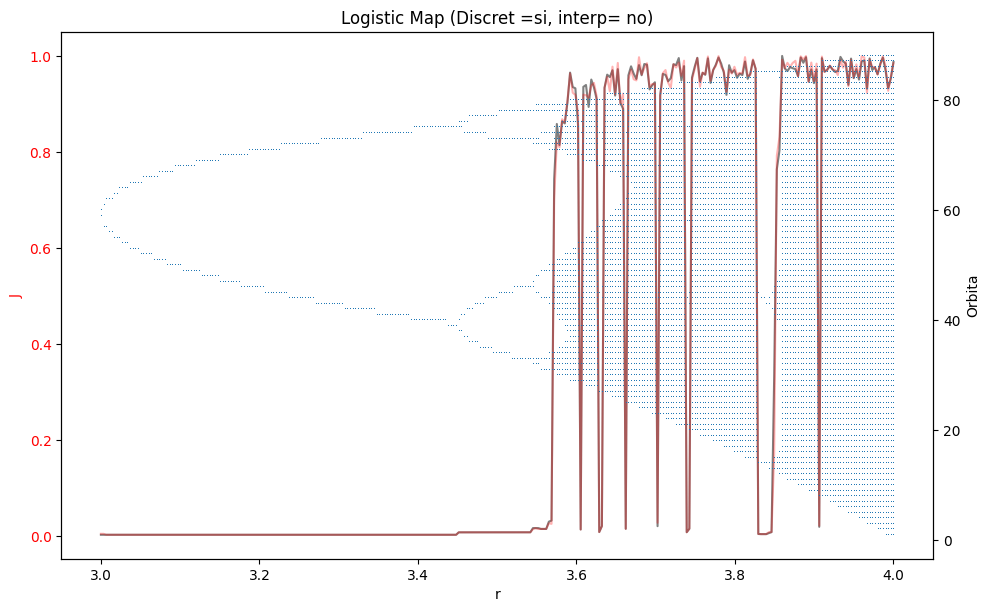

Interpolacion:  si
Interpolación
Dinámica simbólica


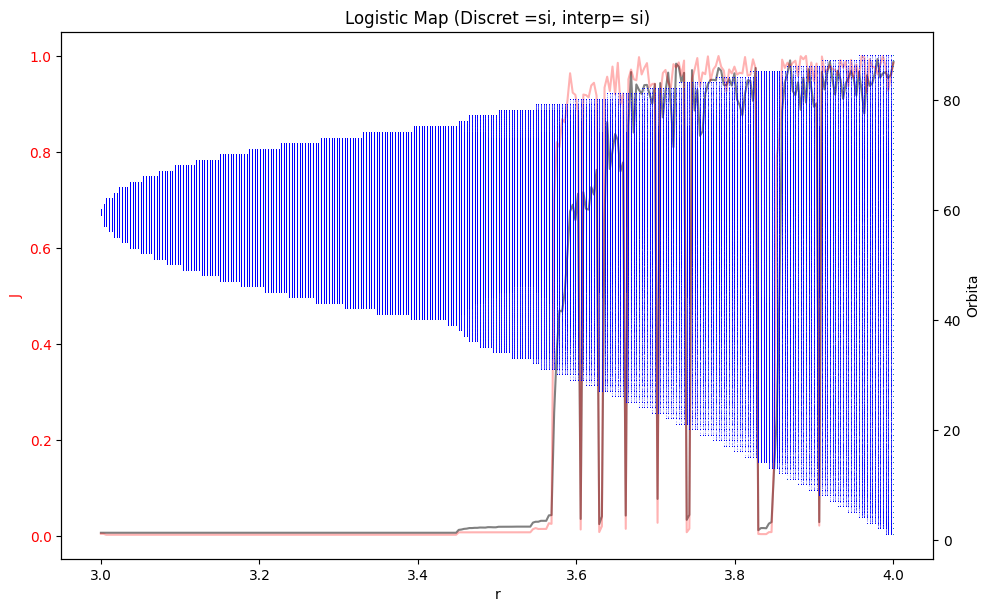

Partición:  100
Interpolacion:  no
Dinámica simbólica


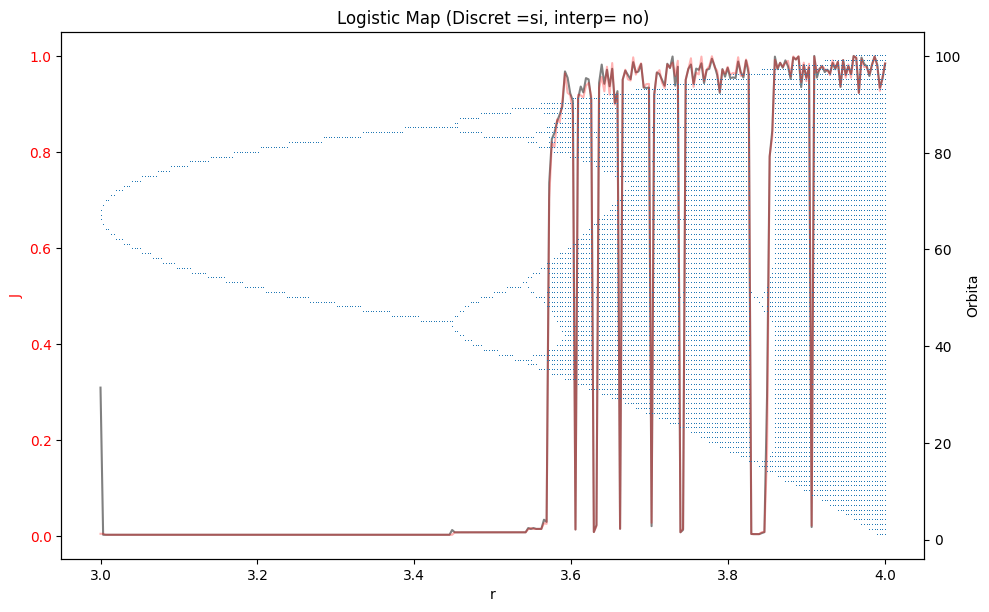

Interpolacion:  si
Interpolación
Dinámica simbólica


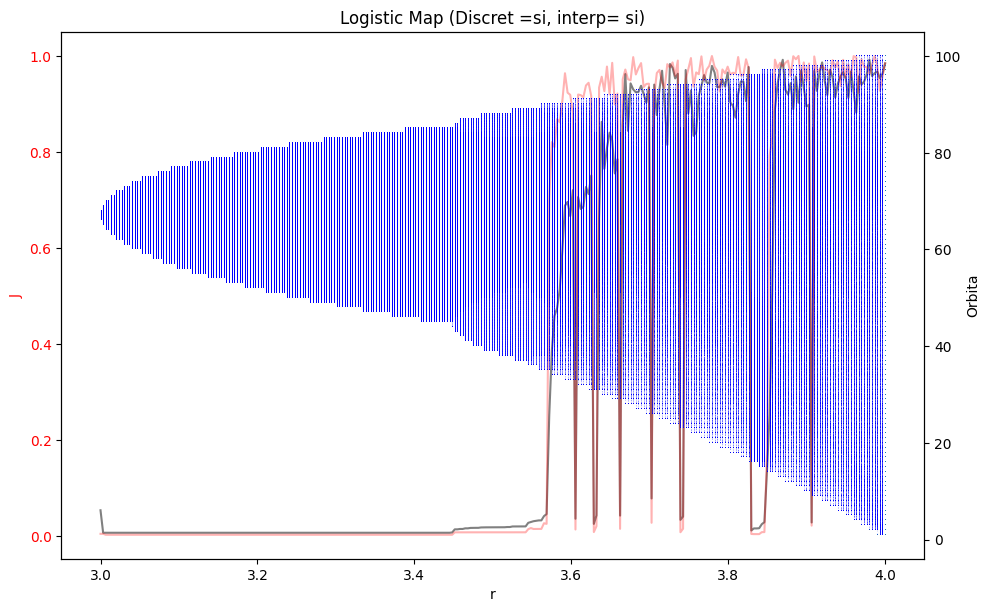

Partición:  200
Interpolacion:  no
Dinámica simbólica


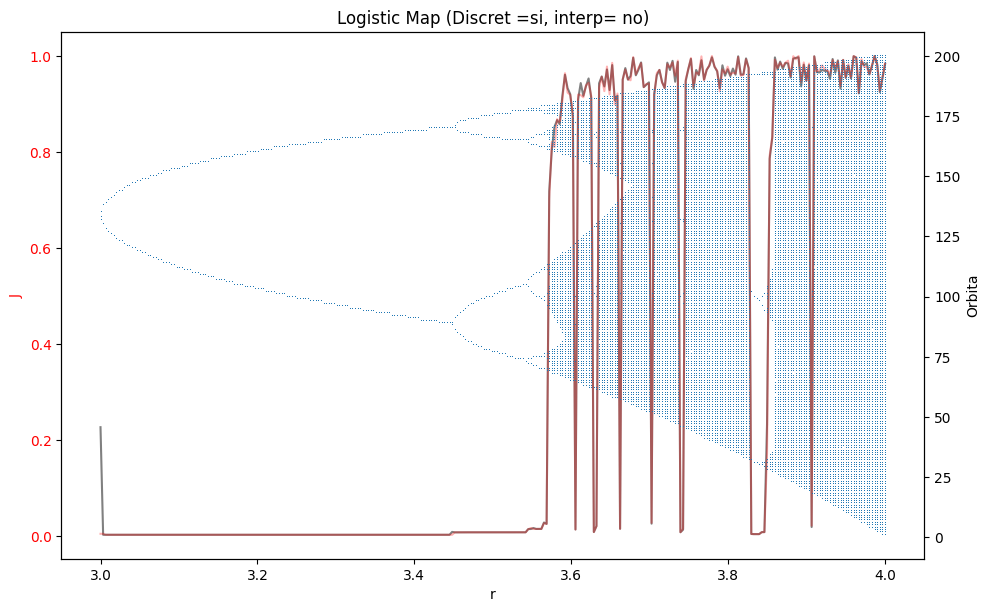

Interpolacion:  si
Interpolación
Dinámica simbólica


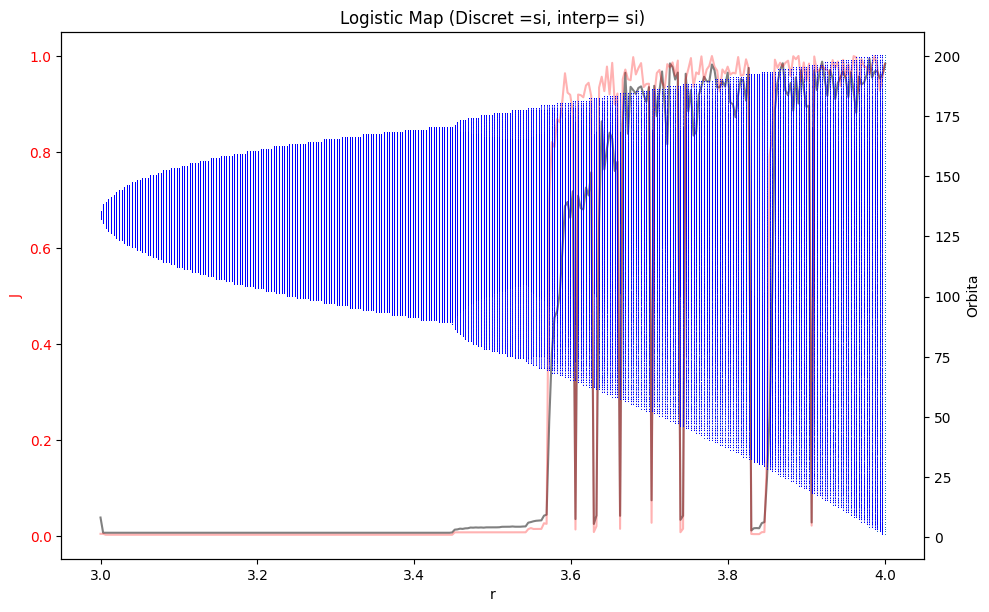

Partición:  300
Interpolacion:  no
Dinámica simbólica


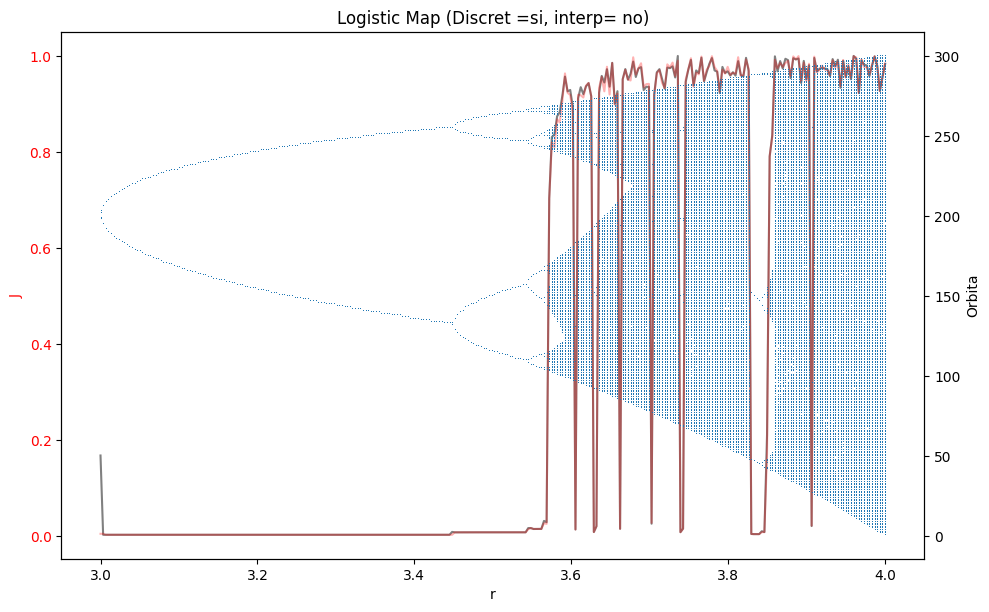

Interpolacion:  si
Interpolación
Dinámica simbólica


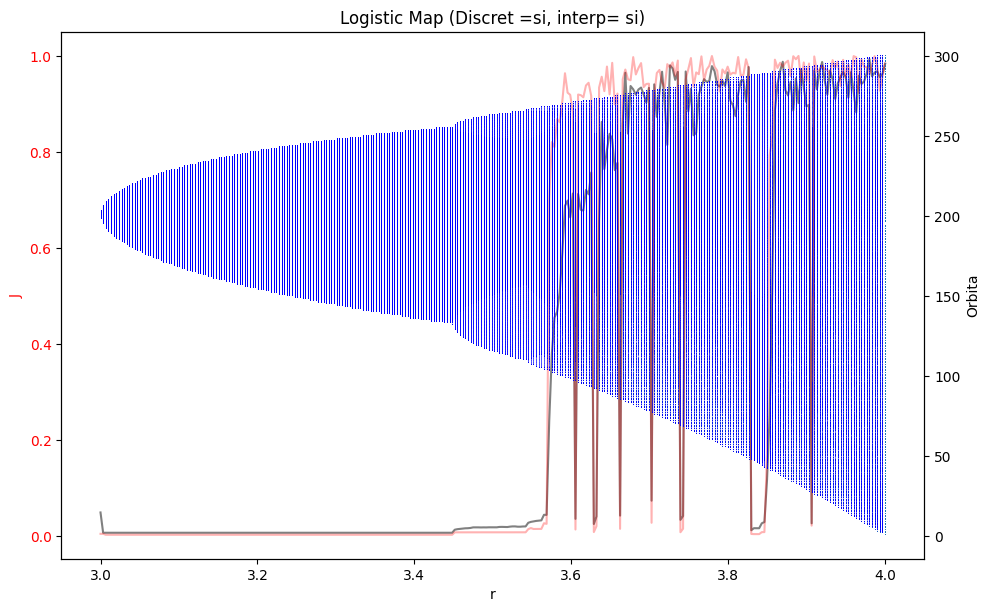

Partición:  400
Interpolacion:  no
Dinámica simbólica


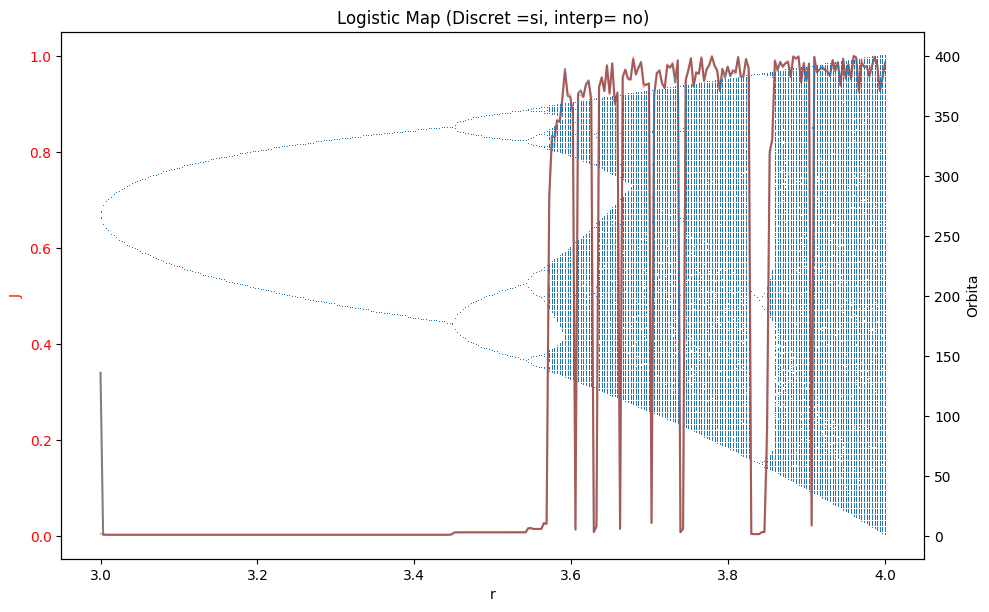

Interpolacion:  si
Interpolación
Dinámica simbólica


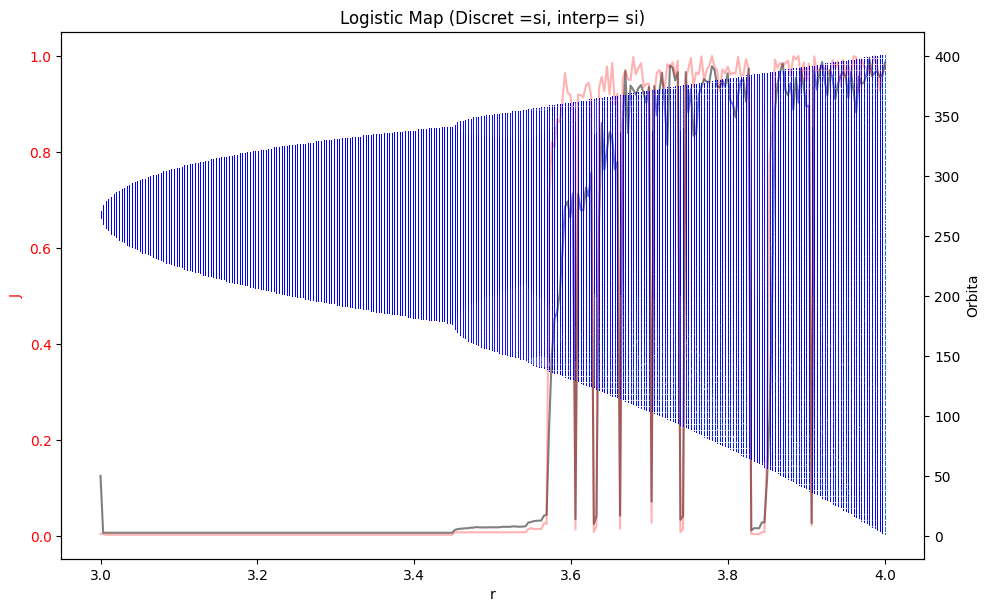

Partición:  500
Interpolacion:  no
Dinámica simbólica


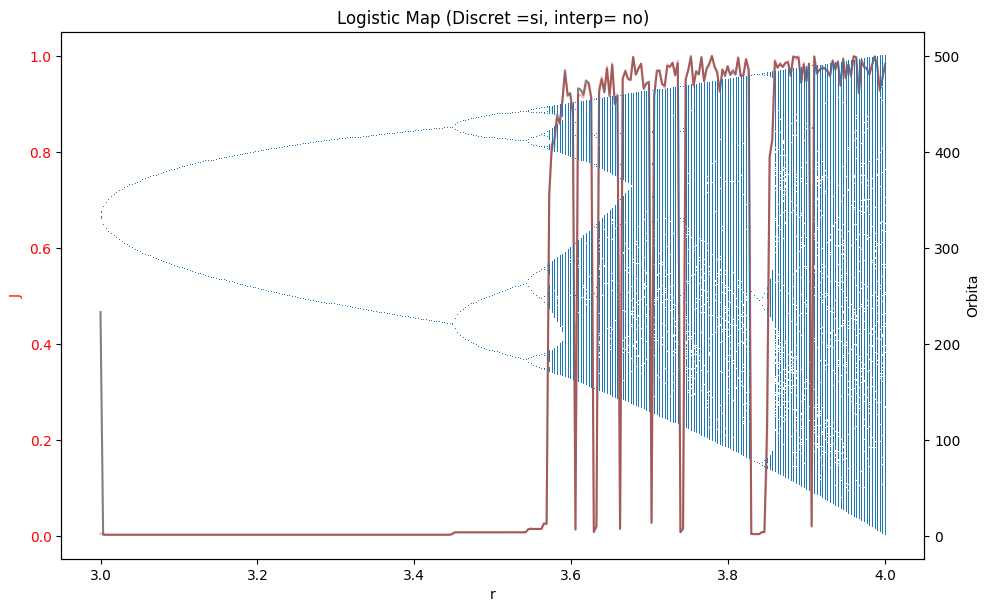

Interpolacion:  si
Interpolación
Dinámica simbólica


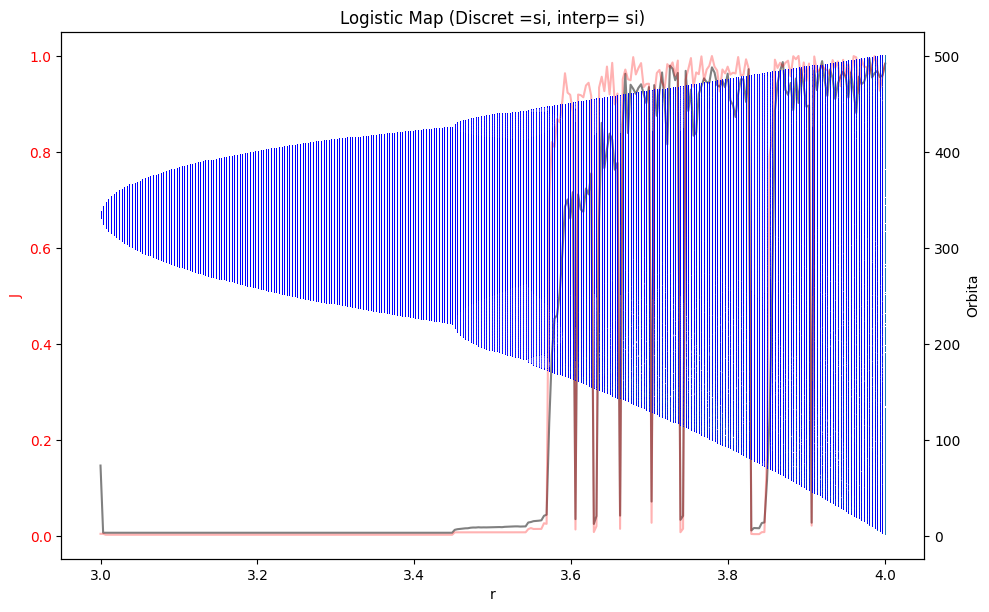

Partición:  1000
Interpolacion:  no
Dinámica simbólica


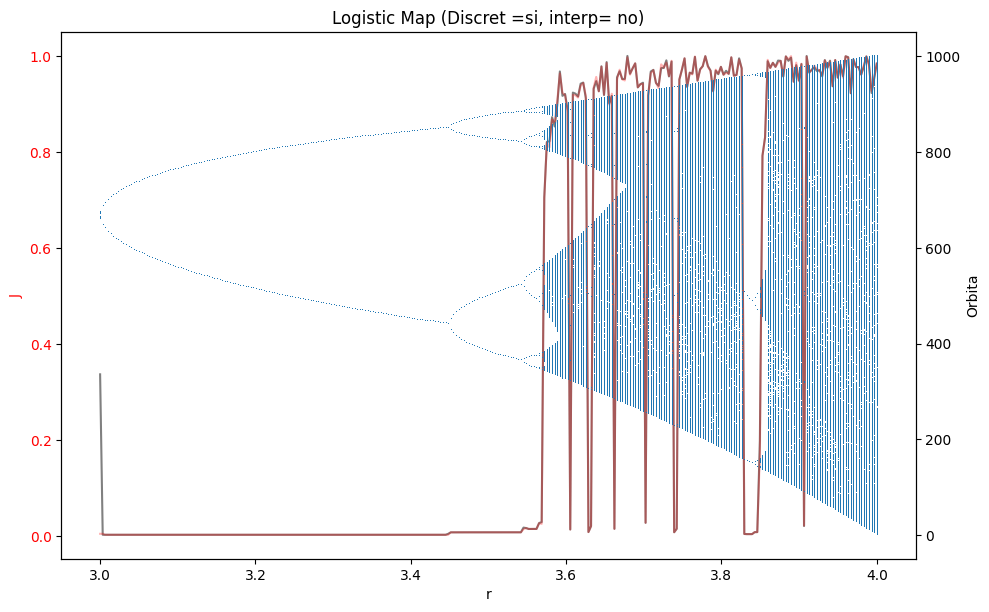

Interpolacion:  si
Interpolación
Dinámica simbólica


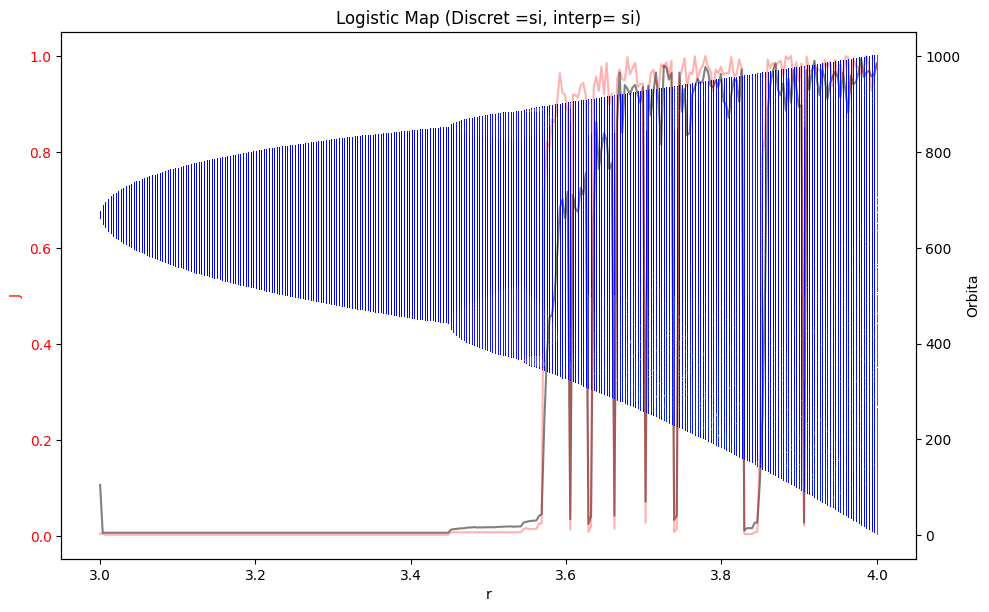

Partición:  2000
Interpolacion:  no
Dinámica simbólica


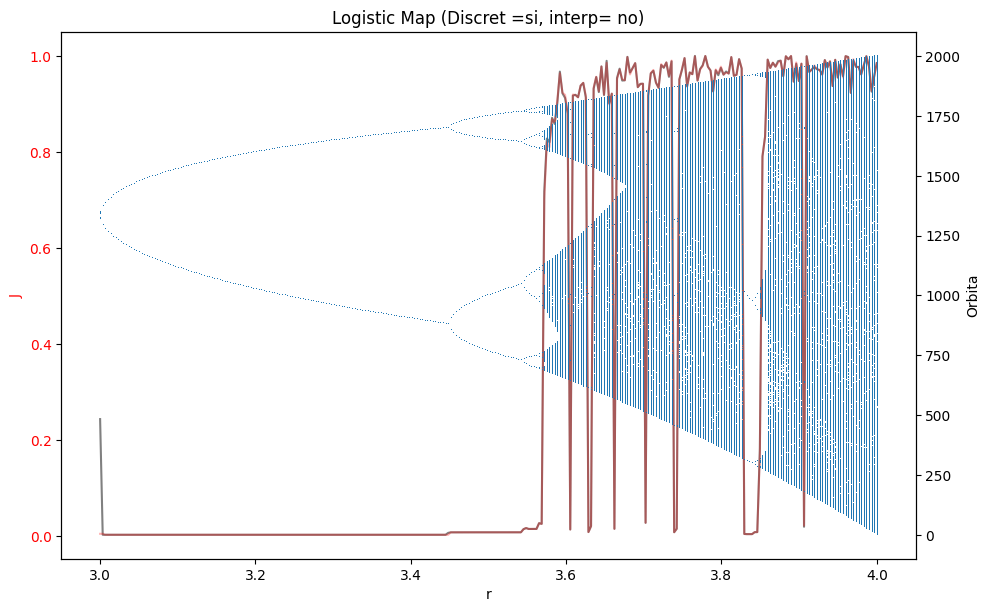

Interpolacion:  si
Interpolación
Dinámica simbólica


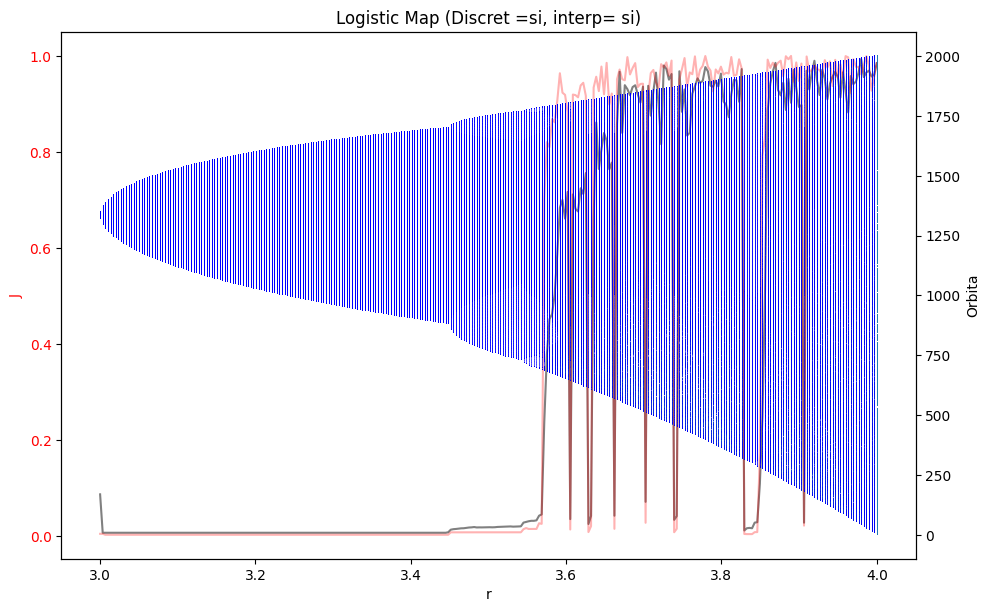

Partición:  3000
Interpolacion:  no
Dinámica simbólica


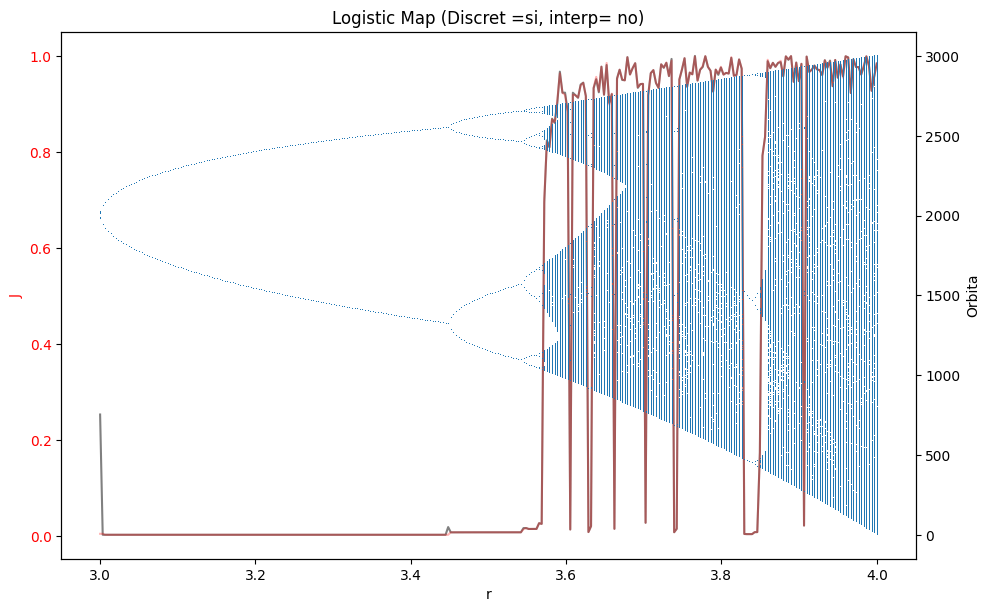

Interpolacion:  si
Interpolación
Dinámica simbólica


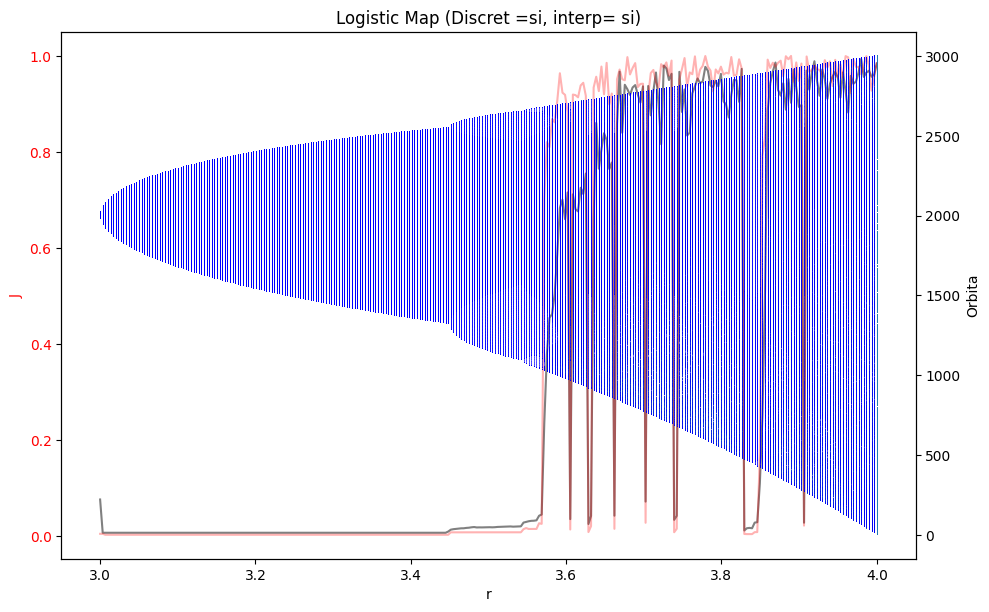

In [7]:
"""interpolacion despues de dinamica simbolica"""

import numpy as np
import matplotlib.pyplot as plt
import import_ipynb


def logistic_map(r, x):
    return r * x * (1 - x)

def plot_orbit_diagram(num_partitions,discreto,interpolacion,r_min = 3.0, r_max = 4.0, num_points_per_r=300, num_iterations_discard=1000, num_iterations_display=2000):
    if discreto == "no" and interpolacion == "si": 
        print("Haz seleccionado interpolación a los datos continuos, eso no tiene caso")
        return 1,2

    if interpolacion == "si":
        print("Interpolación")

    r_values = []
    orbit_values = []
    
    for r in np.linspace(r_min, r_max, num_points_per_r):
        
        x = 0.6
        for _ in range(num_iterations_discard): # Converger
            x = logistic_map(r, x)

        
        for _ in range(num_iterations_display):
            x = logistic_map(r, x)
            r_values.append(r)
            orbit_values.append(x)
    #A partir de aqui, orbita continua de logistica completada
    
    if discreto == "si":
        print('Dinámica simbólica')
        orbit_values = symbolic_sequence_f(orbit_values, num_partitions)

        

    a = 0
    J_values=[]
    J_index=[]
    lyapunov_values = []
    
    r_values_interp = []
    orbit_values_interp = np.array([])

    for i in range(0, len(r_values) - 1):
        if r_values[i] != r_values[i+1]:
            r_single_orbit = orbit_values[a:i+1]
            a = i+1
            
            if interpolacion == 'si':
                x = np.arange(len(r_single_orbit))
                x_new = np.linspace(0, len(r_single_orbit) - 1, 10000)
                x_new = np.unique(np.concatenate((x, x_new)))  
                
                data_interp = np.interp(x_new, x, r_single_orbit)
                r_values_interp = r_values_interp + [r_values[i]]*len(data_interp)
                orbit_values_interp = np.concatenate((orbit_values_interp, data_interp))

                r_single_orbit = data_interp


            lyapunov = lyapunov_exponent_from_orbit(r_single_orbit, r_values[i])
            lyapunov_values.append(lyapunov)

            J = J_univariante(r_single_orbit, 1, int(len(r_single_orbit)))
            J_values.append(J)
            J_index.append(r_values[i])
    
    #ultimo valor de r
    lyapunov = lyapunov_exponent_from_orbit(orbit_values[a:], r_values[len(r_values) - 1])  
    lyapunov_values.append(lyapunov)
    J = J_univariante(orbit_values[a:], 1, int(len(r_single_orbit)))
    J_values.append(J)
    J_index.append(r_values[len(r_values) - 1])

    #A partir de aqui, lyapunob y J fueron calculados

   
    fig, ax1 = plt.subplots(figsize=(10,6))

    with open('j_logistic_continuo.txt', 'r') as f:
        J_continuo = [float(line.strip()) for line in f]
    
    if discreto == "no":
        color = "red"
    elif discreto == "si":
        color = "gray"
    ax1.plot(J_index, J_values, color , label='J', alpha = 1)

    if discreto == "si":
        ax1.plot(J_index, J_continuo, 'red', alpha = 0.3)
    if discreto == "no":
        ax1.plot(r_values, orbit_values, ',', label='Orbita', alpha=1)
    ax1.set_xlabel('r')
    ax1.set_ylabel('J', color='r')
    ax1.tick_params(axis='y', labelcolor='r')


    
    ax2 = ax1.twinx()
    if discreto == "si":
        ax2.plot(r_values, orbit_values, ',', label='Orbita', alpha=1)
    if interpolacion == "si":
        ax2.plot(r_values_interp, orbit_values_interp, ',', label='Orbita', alpha=0.1, color='blue')
    if discreto == "no":
        ax2.axhline(y=0, color='black', linestyle='--', alpha =0.55)
        ax2.plot(J_index, lyapunov_values, 'black', label = 'Lyapunov')
    ax2.set_ylabel('Orbita', color='black')
    ax2.tick_params(axis='y', labelcolor='black')


    
    fig.tight_layout()  
    plt.title(f'Logistic Map (Discret ={discreto}, interp= {interpolacion})')

    plt.show()


    return orbit_values



# orbit_values = plot_orbit_diagram(10,"no","no")

for split in [2,5,10,50,88, 100,200,300,400, 500, 1000, 2000, 3000]:
    print("Partición: ",split)
    for yayo in ["no", "si"]:
        print("Interpolacion: ", yayo)
        orbit_values = plot_orbit_diagram(split,"si", yayo)
